# Yu-Gi-Oh Deck Analysis for 2020

Developed by: Jacob Powell

Start: 6/26/2020

End: 6/26/2020

For this project I wanted to analyze several different Yu-Gi-Oh Decks and compare them by using several different factors: Good or Bad starting hands, Attack, Defense, Consistency, Versatility, and Recovery. However, a question popped up in my head, "How would I be able to compare the interactions between these decks and analyze them more effectively?" This is why I decided to use Python as a medium to assist me in finding these differences and identifying potential similarities among these decks.

For starting I had to import several libraries and my data so as to be able to begin my work. 

In [30]:
import pandas
import matplotlib
import numpy
import matplotlib.pyplot
import seaborn
data = pandas.read_excel('Deck_Analysis_data_2020.xlsx')
data

,Decks,Good,Dead,Attack,Defense,Consistency,Versatility,Recovery,Rating
0,Noble Knights,15,5,7,8,7,7,7,7.2
1,Galaxy Eyes,16,4,9,7,7,7,6,7.2
2,Fluffal,16,4,10,5,8,8,6,7.4
3,Predaplant,16,4,7,5,7,6,7,6.4
4,Mayakashi,16,4,7,6,6,5,8,6.4
...,...,...,...,...,...,...,...,...,...
71,Endymion,17,3,8,8,7,9,7,7.8
72,Unchained,16,4,8,7,7,6,8,7.2
73,Zoodiac,16,4,7,7,7,8,6,7.0
74,Zombie World,16,4,7,7,7,7,8,7.2


I began with trying to find the correlation for all the entries and then using that data to create a heatmap that may be able to help me identify any outliers among the data. If this does not work I will try to take the mean of the Attack, Defense, Consistency, Versatility, and Recovery rankings and use that data for comparison.

In [31]:
quantifier = data.iloc[:, 1:]
normalization = (quantifier - quantifier.mean())/quantifier.std()
# normalization

However to find the distance between points using the Euclidean distance function, I would have to use a method from a previous project.

In [32]:
#Creating a Distance function:
def dist(i,j):     # The Function that works with finding the distance between i and j
    quant = data.iloc[:, 1:] #the quantitative cells
    cat = data.iloc[:, :0]   #the categorical cells
    norm = (quant - quant.mean())/quant.std() #normalized cells for the quant cells
    hdistance = (cat.iloc[i] != cat.iloc[j]).sum()
    
    qdistance = ((norm.iloc[i] - norm.iloc[j]).abs()).sum()
    return hdistance + qdistance

This method will be able to assist in the calculations between two points and allow me to form a distance matrix. With this matrix, I will then be able to take the correlation of the data and form a heatmap from the dataset.

In [33]:
matrix = pandas.DataFrame(index = data.index, columns = data.index, dtype = float)
for i in range(len(matrix.index)):
    for j in range(i):
        matrix.iloc[i,j] = dist(i,j)
        matrix.iloc[j,i] = dist(j,i)
matrix

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,NaN,5.114749,10.174929,6.542230,8.754081,4.165848,6.049050,7.440449,4.638282,5.240117,...,6.553749,8.850411,10.257730,6.839831,4.360121,6.950425,5.240117,4.735418,3.421787,2.881081
1,5.114749,NaN,5.060180,6.764880,8.976731,5.830434,9.406598,8.846523,4.860932,3.769804,...,3.131962,5.687136,5.142981,1.725082,4.073232,7.237313,3.769804,3.006594,3.644437,4.860932
2,10.174929,5.060180,NaN,8.310656,12.279709,7.376210,11.839514,10.205803,6.220212,8.829984,...,5.564878,7.778020,3.052097,3.335098,9.133412,9.670230,8.829984,6.123076,8.704616,9.921111
3,6.542230,6.764880,8.310656,NaN,3.969052,4.069344,10.834078,8.417582,3.847646,4.946550,...,8.203879,10.500542,8.393458,6.732760,7.778020,10.357757,4.946550,5.701984,5.071917,3.661150
4,8.754081,8.976731,12.279709,3.969052,NaN,8.038396,11.094455,8.343702,6.059497,5.206926,...,10.415730,10.760918,12.362510,8.944611,9.989870,12.569607,5.206926,7.913835,5.332294,5.873000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6.950425,7.237313,9.670230,10.357757,12.569607,9.423311,7.744949,12.447176,6.510111,7.362681,...,4.105352,5.787382,7.301698,8.962396,9.617583,NaN,7.362681,6.607247,7.237313,6.696607
72,5.240117,3.769804,8.829984,4.946550,5.206926,5.955802,7.580491,10.923365,4.986300,0.000000,...,5.208804,5.553992,8.912785,5.494886,6.150074,7.362681,NaN,5.083436,1.818330,3.042602
73,4.735418,3.006594,6.123076,5.701984,7.913835,6.460500,7.083569,5.839929,1.854338,5.083436,...,2.501895,8.693730,6.205877,4.731676,4.703299,6.607247,5.083436,NaN,3.265106,3.798036
74,3.421787,3.644437,8.704616,5.071917,5.332294,5.830434,5.762161,9.105035,3.167969,1.818330,...,5.083436,5.428624,8.787417,5.369519,6.024706,7.237313,1.818330,3.265106,NaN,3.167969


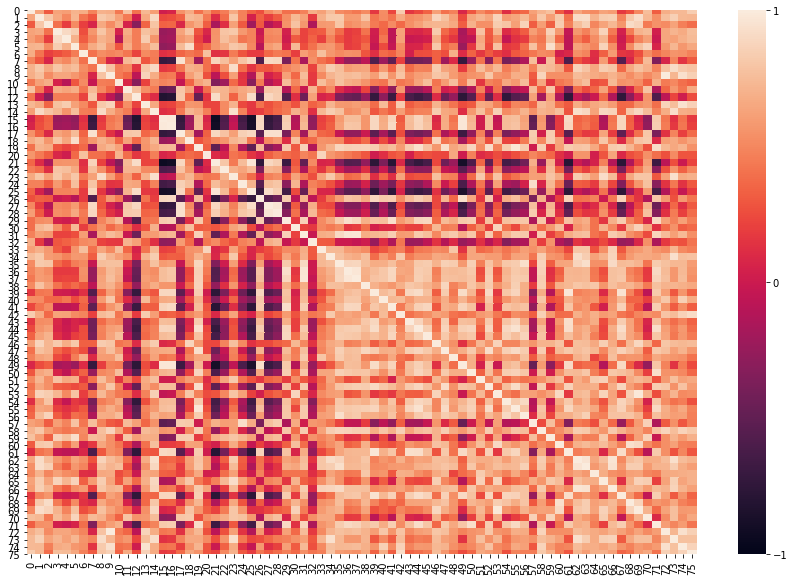

In [34]:
correlation = matrix.corr()
matplotlib.pyplot.figure(figsize = (15,10))
label_ticks = range(-1, 2)
correlmap = seaborn.heatmap(correlation, vmin = -1, vmax = 1, xticklabels=correlation.index, yticklabels=correlation.index, cbar_kws={'ticks': label_ticks})
correlmap

As you can see from this information there is definitely interaction going on between all the decks. However there is some changes in the data for example numbers 15,16, 27 and 28 have some form of correlation that is very close to the fold. So there may be some sort of issue with those decks or in generality.

Even though 15 and 16 have a very close coloration to that of the fold, it seems like they have some form of negative correlation with deck 17. This is noticeable from the dark coloration near the fold. 

# What are the best decks?

We will have to interpret the data to see if there is a cause and effect for the data that can help us determine the playstyle or key factors the most powerful decks have in common. 

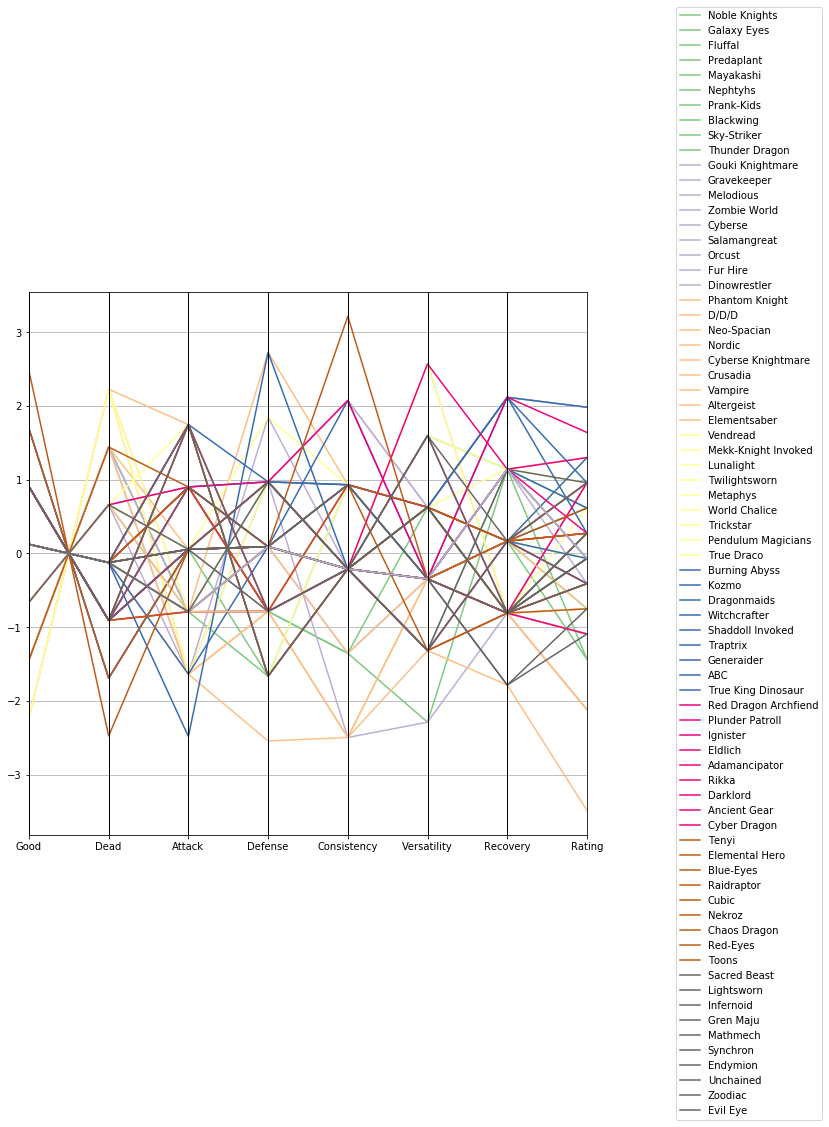

In [35]:
from pandas.plotting import parallel_coordinates
parallel_matrix = normalization.copy()
parallel_matrix['Decks'] = data.Decks
matplotlib.pyplot.figure(figsize = (10,10))
parallel_coordinates(parallel_matrix, 'Decks', normalization.columns, colormap = matplotlib.pyplot.cm.Accent)
matplotlib.pyplot.legend(loc = 'center left', bbox_to_anchor = (1.15, 0.5))

As we can see many of these decks share the same paths and most if not all meet at more than one single point. However, what do the top 5 highest rated decks all have in common? For this we will have to go about calculating the mean and deriving a score that we can use to track the top 5 and give a general overall rating to each deck. Once done we can then verify the top 5 decks.

In [36]:
table = data.copy()
mean = []
for i in range(len(table)):
    mean.append((table.Attack[i] + table.Defense[i]+table.Consistency[i]+table.Recovery[i]+table.Versatility[i])/5)
table['Mean'] = mean
table = table.sort_values(by = 'Mean', ascending = False)

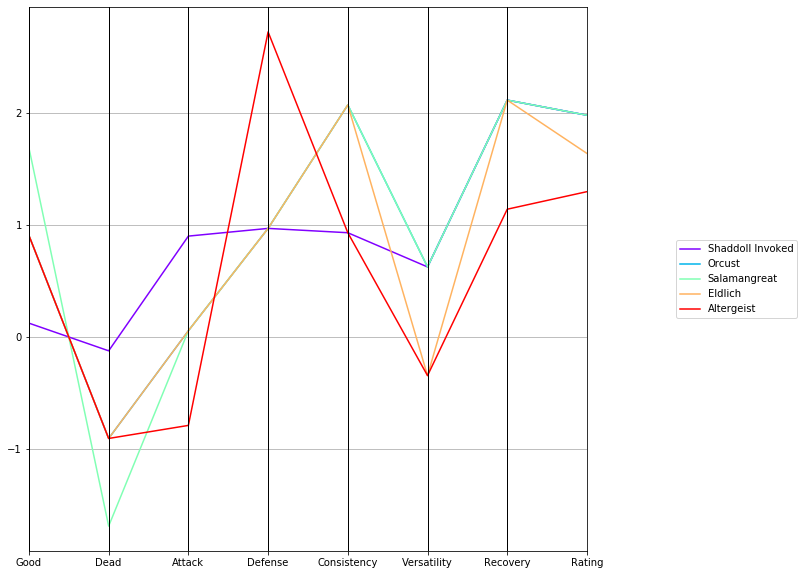

In [37]:
parallel_matrix2 = normalization.copy()
parallel_matrix2['Decks'] = table.Decks
parallel_matrix2['Mean'] = table.Mean
paralel_matrix2 = parallel_matrix2.sort_values(by = 'Mean', ascending = False)
top5 = paralel_matrix2.iloc[:5,:]
matplotlib.pyplot.figure(figsize = (10,10))
parallel_coordinates(top5, 'Decks', normalization.columns, colormap = matplotlib.pyplot.cm.rainbow)
matplotlib.pyplot.legend(loc = 'center left', bbox_to_anchor = (1.15, 0.5))

From this we can see that the top 5 decks are Shaddoll Invoked, Orcust, Salamangreat, eldlich, and Altergeist. Yet, we see that all these decks share multiple points in common. 

The first we notice is that they all seem to have a very low chance in getting a dead or unusable hand, which is due to their high consistency. We see that while dead hands decline that the consistency of the deck increases. We also see that their versatility seems to decline as their recovery inclines. This may be due to the versatility of being mixed with other archetypes or different play styles decrease the ability of these decks to recover in the later game state. 

Another factor to notice is that the trend for a aggressive playstyle versus a defensive playstyle. From the graph above we see that most if not all the decks have a higher defense and a lower attack. This proves that the more defensive playstyle that allows most people to endure a longer "grind game" or last longer in each round. These stats resemble more of a control based strategy, where the player can use their defenses to widdle down their attackers resources until they have made a very difficult board state for their opponent to play against.

However does each deck within the top five best decks reside in a different category along with other decks? If so we may have to see if there is any form of grouping in which they share.

# Determining Groups

In [38]:
import sklearn.cluster
import sklearn.manifold
import nose.tools

When it comes to determining the grouping of the power of each deck variable we will be using K-Means clustering in assistance to help us determine whether our data will follow more of a linear pattern within its grouping or not. If it does follow a more linear pattern then we can tell that each deck has a certain power rating that has been crept out of the meta. However, if the data follows another pattern, whether it be exponential or no pattern, we will be able to assess whether the pattern is significant or not.

*Power Creep: When a Decks overall power and rating are significant now but due to new decks being developed they soon become overwhelmed and are no longer considered as powerful as they once were*

In [39]:
km = sklearn.cluster.KMeans(n_clusters = 7)
labels = km.fit_predict(normalization)
new_table = table.copy()
new_table['Cluster'] = labels
new_table = new_table.sort_values(by = 'Cluster', ascending = True)

In [40]:
mdsinits = normalization.loc[:, ['Versatility', 'Recovery','Consistency','Attack', 'Defense']]
ms = sklearn.manifold.MDS(n_components = 2, dissimilarity = 'euclidean', \
                         eps = 0, max_iter = 1000, n_init = 1)
#---------------------------------------------------------------------------
red_data = pandas.DataFrame(ms.fit_transform(normalization, mdsinits), columns = ['X', 'Y'])
dist_table = pandas.DataFrame(columns = ['Rating', 'X', 'Y'])
dist_table.Rating = table.Rating
dist_table.X = red_data.X
dist_table.Y = red_data.Y
new_table['X'] = abs(red_data.X)
new_table['Y'] = abs(red_data.Y)

We will be trying to break the decks into seven different clusters and try to identify them by their Attack, Defense, Consistency, Recovery, and Versatitility. Once done we will be able to plot the information and then develop the grouping.

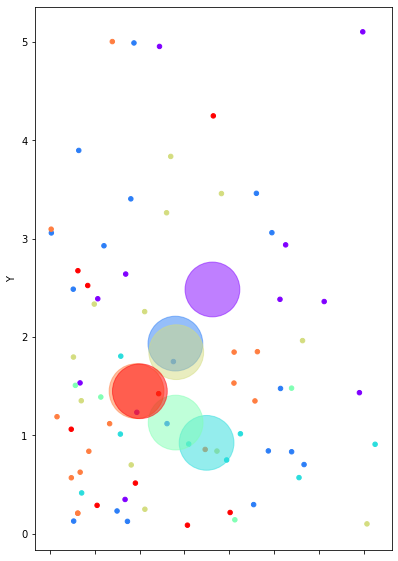

In [41]:
plot = new_table.plot.scatter(c= 'Cluster', x = 'X', y = 'Y', cmap = matplotlib.pyplot.cm.rainbow, figsize = (10,10))
groups = new_table.groupby('Cluster')
centroid = groups.mean()
centroid.plot.scatter(c = centroid.index, x = 'X', y = 'Y', cmap = matplotlib.cm.rainbow, s = 3000, ax = plot, alpha = .5)
plot.figure.axes[1].remove()
plot.figure.axes[1].remove()

As we can see, the clusters seem to follow a linear pattern, thus showing there is some form of power creep. However is that what the general clusters look like or is it their centroids as well? If they are linear then this is a definite observation on how power creep is attributed to these variables.

In [42]:
newCentTab = pandas.DataFrame(centroid.X, columns = ['X', 'Y'])
newCentTab.Y = centroid.Y
newCentTab

,X,Y
Cluster,,
0,1.811649,2.482561
1,1.399273,1.932155
2,1.746428,0.923286
3,1.402044,1.129354
4,1.408689,1.845203
5,0.966756,1.448992
6,1.003877,1.448025


So from what we can tell from the data is that most of these decks are adapting to a control based playstyle. This may cause a formation of different decks adapt to combat this playstyle, or they will change to that kind of playstyle themselves.

# Conclusion

From all of this information, we can see that the top tiering decks or most well performing decks are all following a control based playstyle. However what does this mean for as a result in power creep and the future of other decks? Well in the future these decks will become less powerful due to some overall hit on the banlist and will suffer some hit to their consistency making them no longer a top tier deck.

But what does this mean for the remainder of the year? For this we can see that for the remainder of this year the top five decks will be Shaddoll Inovked, Eldlich, Altergeist, Orcust, and Salamangreat. Even though two of these decks are now considered rouge variants or lower tiers, their abilities to perform in a competition are better than most other decks of this past year. Yet given time, we will see that these decks Orcust and Salamangreat, our two rouge variants will be no longer considered meta and may be forgotten. However, for now they will go on to take a few top spots in the competitions all around the world, and for our next year, 2020-2021, we will have to see what happens. 

Will these decks defy all odds and stay relevant for competitive use or will they fall out of favor and be cast out? Well that is up to the players and how the banlist(s) of 2020-2021 develop.

# Credits for Data:


Data obtained from the following YouTubers:
- El Exordio del Duelista
- Ricon del Duelista